# Analise Exploratória dos Dados de Valores de Venda de Imóveis na cidade de SP

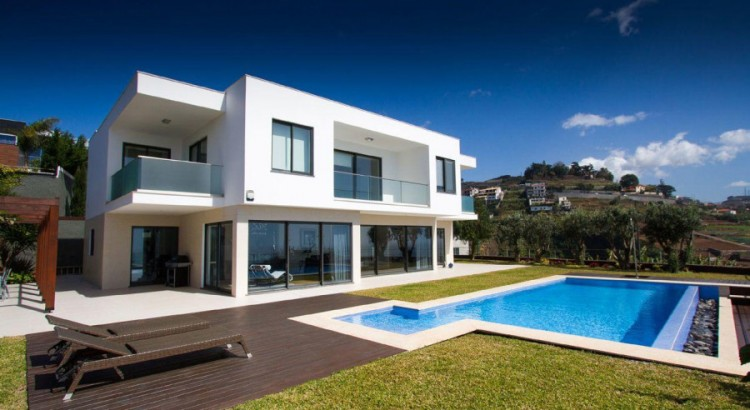

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Download dos dados

In [202]:
url_dados = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

dataset = pd.read_csv(url_dados)

# explorar os dados de maneira inicial
dataset.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000


In [203]:
# split do valor da venda em 3 colunas para tratamento dos dados
dataset[['Moeda', 'Valor_Anuncio', 'Tipo_Aluguel']] = dataset.Valor.str.split(expand=True)
dataset.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Aluguel
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None


In [204]:
# conversão do valor de string para ponto flutuante (Float)
dataset['Valor_Anuncio'] = dataset['Valor_Anuncio'].str.replace('.', '').astype(float)
dataset

/tmp/ipykernel_2470/2029062471.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Valor_Anuncio'] = dataset['Valor_Anuncio'].str.replace('.', '').astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Aluguel
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.000,None
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2200.000,/Mês


### Eliminando as coluna Moeda e Valor

In [205]:
dataset['Moeda'].unique()

array(['R$'], dtype=object)

In [206]:
dataset.drop(columns=['Moeda', 'Valor'], inplace=True)
dataset.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.000,None
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.000,None
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.000,None
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.000,None
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,199900.000,None
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,585000.000,None


### Filtrando somente as vendas

In [207]:
dataset.Tipo_Aluguel.isna().value_counts()

True     9156
False     852
Name: Tipo_Aluguel, dtype: int64

In [208]:
## 852 alugueis e 9156 vendas

In [209]:
dados_vendas = dataset[dataset['Tipo_Aluguel'].isna() == True]
dados_vendas.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.000,None
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.000,None
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.000,None
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.000,None
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,199900.000,None
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,585000.000,None


In [210]:
dados_vendas.Tipo_Aluguel.isna().value_counts()

True    9156
Name: Tipo_Aluguel, dtype: int64

### Cálculos de m2 

In [211]:
dados_vendas['Valor_m2'] = dados_vendas['Valor_Anuncio']/dados_vendas['Metragem']
dados_vendas.head(6)

/tmp/ipykernel_2470/1237216265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_m2'] = dados_vendas['Valor_Anuncio']/dados_vendas['Metragem']


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.000,None,7000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.000,None,7459.677
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.000,None,3040.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.000,None,2209.677
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.000,None,5400.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.000,None,4500.000


In [212]:
## cálculo de médias por Bairro para os 697 bairros
dados_vendas.groupby(by=['Bairro']).mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2
Bairro,,,,,,
Aclimação,246.165,3.266,3.038,2.911,1763200.013,7656.169
Alto da Boa Vista,418.875,4.125,5.125,4.625,2391250.000,5849.569
Alto da Lapa,299.250,3.150,3.850,4.000,2083168.750,7606.728
Alto da Mooca,270.050,3.300,2.600,3.650,1184170.000,5691.740
Alto de Pinheiros,429.854,3.938,4.829,4.951,4782698.957,11269.980
...,...,...,...,...,...,...
Vila Água Funda,152.200,2.600,2.200,2.600,652000.000,4467.128
Água Branca,173.583,3.083,3.250,2.250,1226500.000,7269.114
Água Fria,165.417,2.833,3.417,2.500,927083.333,5841.104


In [213]:
## cálculo de medianas por Bairro para os 697 bairros
dados_vendas.groupby(by=['Bairro']).median()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2
Bairro,,,,,,
Aclimação,220.000,3.000,3.000,3.000,1500000.000,7272.727
Alto da Boa Vista,378.000,4.000,5.500,4.000,2275000.000,5831.933
Alto da Lapa,265.000,3.000,4.000,4.000,1750000.000,7402.597
Alto da Mooca,182.500,3.000,2.000,4.000,1222500.000,5801.282
Alto de Pinheiros,412.000,4.000,5.000,4.000,4100000.000,10703.125
...,...,...,...,...,...,...
Vila Água Funda,143.000,2.000,2.000,2.000,650000.000,4111.111
Água Branca,171.500,3.000,3.000,2.000,1205000.000,6584.813
Água Fria,174.500,3.000,4.000,2.000,1197500.000,6076.923


In [214]:
## cálculo de somas por Bairro para os 697 bairros
dados_vendas.groupby(by=['Bairro']).sum()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.000,604837.388
Alto da Boa Vista,3351,33,41,37,19130000.000,46796.552
Alto da Lapa,23940,252,308,320,166653500.000,608538.246
Alto da Mooca,5401,66,52,73,23683400.000,113834.803
Alto de Pinheiros,158616,1453,1782,1827,1764815915.000,4158622.609
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.000,22335.640
Água Branca,2083,37,39,27,14718000.000,87229.367
Água Fria,1985,34,41,30,11125000.000,70093.253


In [215]:
## Outro cálculo de média de valor por m2 por bairro

dados_bairro = dados_vendas.groupby(by=['Bairro']).sum()
dados_bairro['Valor_m2_bairro'] = dados_bairro['Valor_Anuncio']/dados_bairro['Metragem']
dados_bairro.head(10)

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.000,604837.388,7162.688
Alto da Boa Vista,3351,33,41,37,19130000.000,46796.552,5708.744
Alto da Lapa,23940,252,308,320,166653500.000,608538.246,6961.299
Alto da Mooca,5401,66,52,73,23683400.000,113834.803,4385.003
Alto de Pinheiros,158616,1453,1782,1827,1764815915.000,4158622.609,11126.342
Aricanduva,278,3,3,2,480000.000,1726.619,1726.619
Balneário Mar Paulista,250,4,4,10,900000.000,3600.000,3600.000
Barra Funda,2438,45,43,25,13836003.000,111121.816,5675.145
Barro Branco (Zona Norte),4675,32,37,46,28460000.000,55316.778,6087.701


### Plot de bairros X valor m2 por bairro para 5 bairros com mais anúncios

In [216]:
# TOP 15 bairros com anúncios, lista de numeros
top15 = dados_vendas['Bairro'].value_counts()[:5].index.tolist()

In [217]:
# transformando oo index em coluna
dados_bairro.reset_index(inplace=True)

In [218]:
dados_bairro.query("Bairro in @top15")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.000,4158622.609,11126.342
19,Brooklin Paulista,70002,778,862,832,475796789.000,1627341.875,6796.903
155,Jardim Europa,118898,795,993,1056,2414172900.000,4192164.453,20304.571
168,Jardim Guedala,972212,1443,2027,2161,1801165587.000,2833882.790,1852.647
227,Jardim Paulista,130283,1028,1231,1171,2136081000.000,4279262.191,16395.700


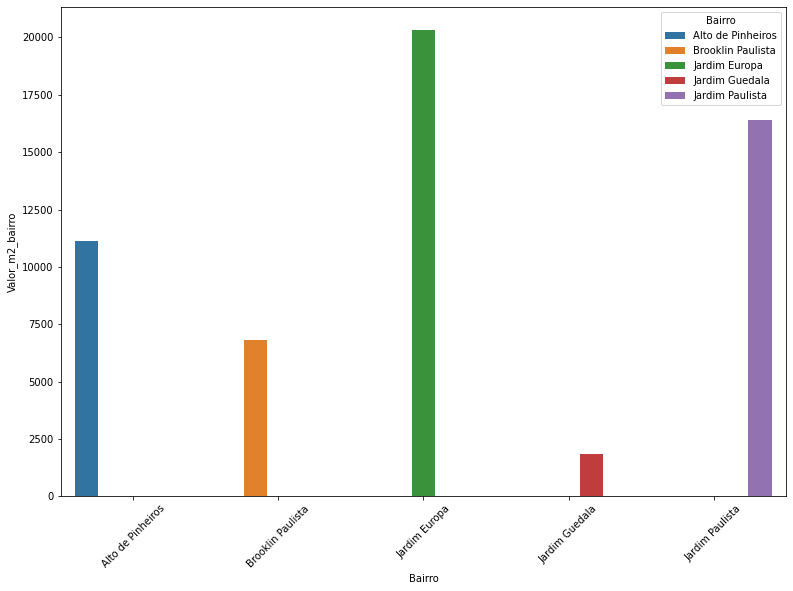

In [219]:
plt.figure(figsize=(13,9))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", hue='Bairro', data=dados_bairro.query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

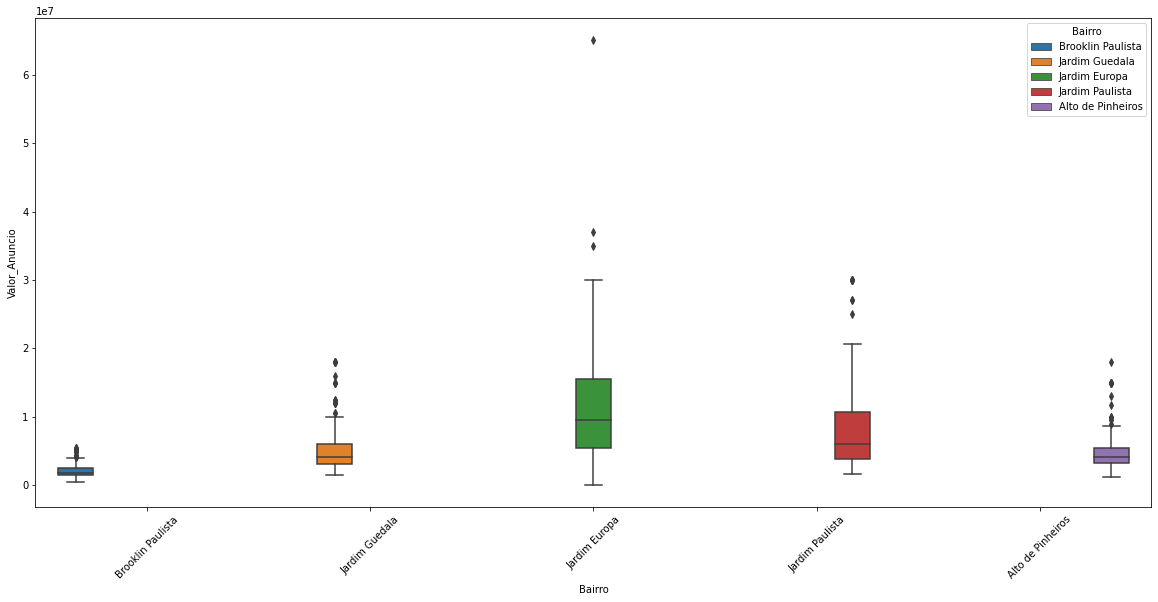

In [220]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="Bairro", y="Valor_Anuncio", hue='Bairro', data=dados_vendas.query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

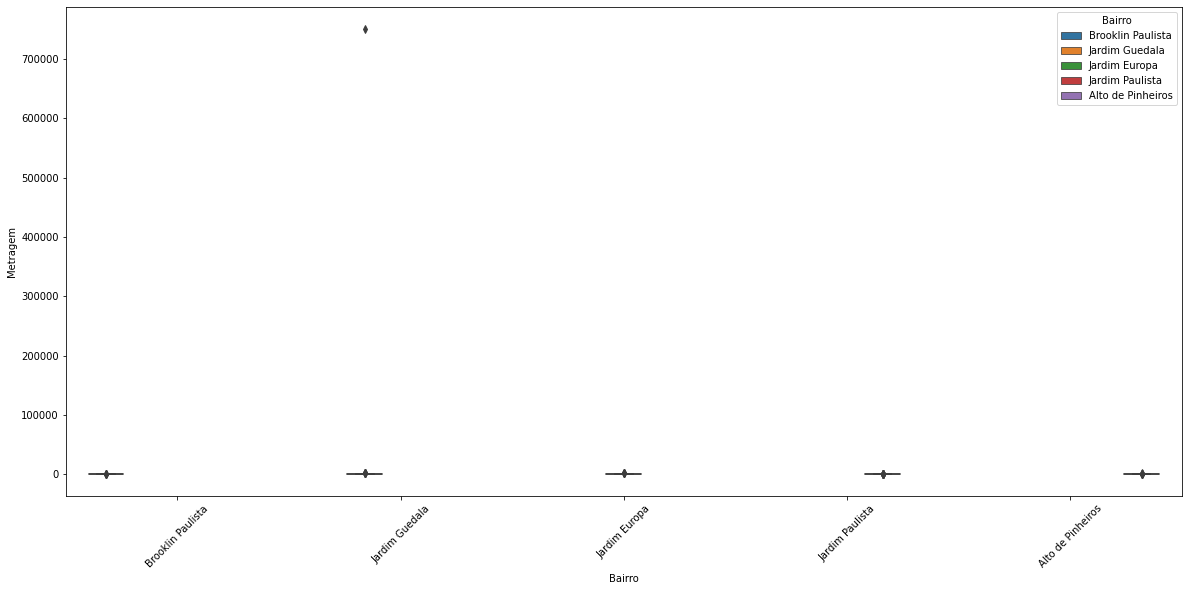

In [221]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="Bairro", y="Metragem", hue='Bairro', data=dados_vendas.query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

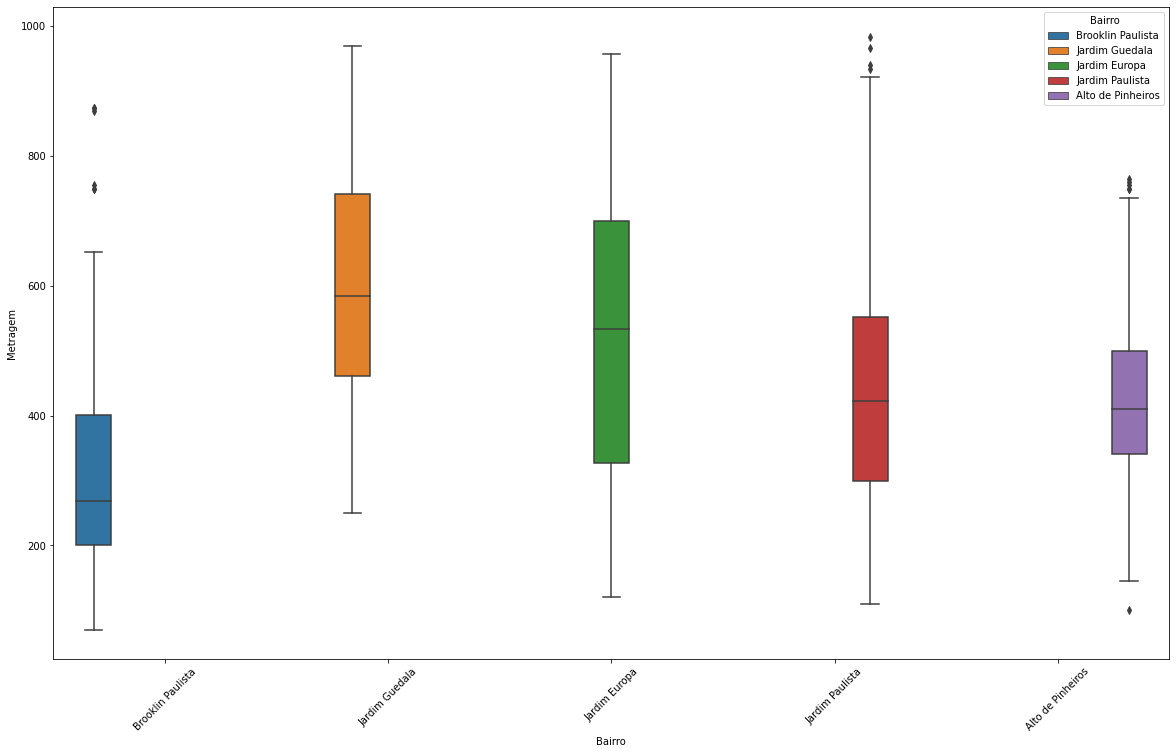

In [222]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="Bairro", y="Metragem", hue='Bairro', data=dados_vendas.query("Bairro in @top15 & Metragem < 1000"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

# Desafios

### 1 - Ler os dados do IBGE

In [201]:
ibge_url = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'

#usar o separador de ; ao invés da vírgula
ibge = pd.read_csv(ibge_url, sep=';', encoding='latin1')
ibge.drop(columns=['Cod_setor', 'Cod_Grandes Regiï¿½es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Situacao_setor',
       'Tipo_setor'], inplace=True)

ibge.head(5)

,Cod_municipio,Nome_do_municipio,Cod_bairro,Nome_do_bairro,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,3550308,Sï¿½O PAULO,3550308000,Sï¿½O PAULO (todos os setores),266.000,800.000,"3,01","2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,3550308,Sï¿½O PAULO,3550308000,Sï¿½O PAULO (todos os setores),306.000,913.000,"2,98","2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,3550308,Sï¿½O PAULO,3550308000,Sï¿½O PAULO (todos os setores),189.000,625.000,"3,31","3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,3550308,Sï¿½O PAULO,3550308000,Sï¿½O PAULO (todos os setores),181.000,572.000,"3,16","2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,3550308,Sï¿½O PAULO,3550308000,Sï¿½O PAULO (todos os setores),240.000,754.000,"3,14","2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN


### 2 - Tratar Outliers

In [224]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2
count,9156.000,9156.000,9156.000,9156.000,9156.000,9156.000
mean,434.416,3.447,3.797,3.960,3052202.955,8004.067
std,7856.423,1.049,1.968,2.601,3944208.186,5291.318
min,10.000,1.000,1.000,1.000,13000.000,9.333
25%,168.000,3.000,2.000,2.000,890000.000,4750.000
50%,276.000,3.000,4.000,4.000,1800000.000,6500.000
75%,450.000,4.000,5.000,5.000,3500000.000,9453.782
max,750000.000,16.000,40.000,50.000,65000000.000,80000.000


In [258]:
# descobrindo outliers em Metragem
dados_vendas[dados_vendas['Metragem'] > 2000]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
1842,"Avenida Nova Cantareira, 4337",Tucuruvi,São Paulo,2160,3,4,10,4900000.000,None,2268.519
1936,"Avenida Nova Cantareira, 4337",Tucuruvi,São Paulo,2165,3,4,10,4900000.000,None,2263.279
2508,NaN,Retiro Morumbi,São Paulo,2100,7,14,12,19800000.000,None,9428.571
4788,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,4000000.000,None,1403.509
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,2900000.000,None,78.378
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,2550000.000,None,71.475
6908,NaN,Retiro Morumbi,São Paulo,2200,6,8,12,19000000.000,None,8636.364
7026,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2200,6,9,15,19800000.000,None,9000.000
7067,Rua Itassuce,Pacaembu,São Paulo,2500,3,7,12,12500000.000,None,5000.000
7478,"Rua General Pereira da Cunha, 505",Retiro Morumbi,São Paulo,2200,6,6,12,19000000.000,None,8636.364


In [259]:
# descobrindo outliers em Quartos
dados_vendas[dados_vendas['Quartos'] > 7]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
170,Rua Manuel Francisco Alves,Parque Casa de Pedra,São Paulo,232,8,3,1,500000.000,None,2155.172
224,NaN,Vila Sabrina,São Paulo,500,8,5,1,990000.000,None,1980.000
457,"Avenida IV Centenário, 544",Jardim Luzitânia,São Paulo,675,8,6,9,9900000.000,None,14666.667
493,"Rua Turiassu, 189",Perdizes,São Paulo,300,8,4,1,2000000.000,None,6666.667
1127,Rua Bandim,Boaçava,São Paulo,350,11,8,10,2500000.000,None,7142.857
1145,Rua Murtinho Nobre,Butantã,São Paulo,1181,8,10,20,4300000.000,None,3640.982
1179,Rua Murtinho Nobre,Butantã,São Paulo,1186,8,10,20,4300000.000,None,3625.632
1273,NaN,Vila Monumento,São Paulo,750,10,8,8,3500000.000,None,4666.667
1589,Rua Sílvio Portugal,Pacaembu,São Paulo,950,9,12,6,3200000.000,None,3368.421
1726,NaN,Jardim Paulista,São Paulo,450,13,7,7,13000000.000,None,28888.889


In [262]:
# descobrindo outliers em Banheiros
dados_vendas[dados_vendas['Banheiros'] > 9]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
614,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,760,5,10,6,12000000.000,None,15789.474
630,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,765,5,10,6,12000000.000,None,15686.275
937,Rua Bandeirante Sampaio Soares,Vila Morumbi,São Paulo,850,6,11,4,10000000.000,None,11764.706
1145,Rua Murtinho Nobre,Butantã,São Paulo,1181,8,10,20,4300000.000,None,3640.982
1179,Rua Murtinho Nobre,Butantã,São Paulo,1186,8,10,20,4300000.000,None,3625.632
1203,Avenida Piassanguaba,Planalto Paulista,São Paulo,1040,6,12,10,3000000.000,None,2884.615
1237,NaN,Jardim Leonor,São Paulo,973,7,10,6,6200000.000,None,6372.045
1324,Rua Campo Verde,Jardim Europa,São Paulo,1150,6,10,6,15000000.000,None,13043.478
1378,Rua Campo Verde,Jardim Europa,São Paulo,1155,6,10,6,15000000.000,None,12987.013
1494,NaN,Alto de Pinheiros,São Paulo,555,5,10,5,6200000.000,None,11171.171


In [263]:
# descobrindo outliers em Vagas
dados_vendas[dados_vendas['Vagas'] > 10]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
260,Rua dos Franceses,Morro dos Ingleses,São Paulo,1039,6,7,20,22000000.000,None,21174.206
353,NaN,Jardim das Camélias,São Paulo,1700,4,7,13,3300000.000,None,1941.176
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,65000000.000,None,43046.358
627,Avenida das Magnólias,Cidade Jardim,São Paulo,1915,4,8,25,25000000.000,None,13054.830
643,Avenida das Magnólias,Cidade Jardim,São Paulo,1920,4,8,25,25000000.000,None,13020.833
...,...,...,...,...,...,...,...,...,...,...
9362,NaN,Morumbi,São Paulo,1100,5,6,16,7000000.000,None,6363.636
9592,Alameda dos Tacaúnas,Planalto Paulista,São Paulo,1300,5,4,20,8000000.000,None,6153.846
9602,NaN,Mooca,São Paulo,316,3,3,12,2000000.000,None,6329.114
9791,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2000,6,10,12,19000000.000,None,9500.000


In [303]:
# Tratando Outliers
f1 = dados_vendas['Metragem'] <= 900
f2 = dados_vendas['Quartos'] <= 8
f3 = dados_vendas['Banheiros'] <= 10
f4 = dados_vendas['Vagas'] <= 5

In [312]:
dados_vendas[f1 & f2 & f3 & f4].head(6)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.000,None,7459.677
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.000,None,3040.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.000,None,2209.677
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.000,None,5400.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.000,None,5862.069
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.000,None,3000.000


In [305]:
dados_vendas[f1 & f2 & f3 & f4].describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Valor_m2
count,7145.000,7145.000,7145.000,7145.000,7145.000,7145.000
mean,271.765,3.257,3.415,2.945,2230110.606,7625.204
std,158.922,0.903,1.663,1.195,2446472.751,4737.400
min,10.000,1.000,1.000,1.000,13000.000,34.404
25%,150.000,3.000,2.000,2.000,790000.000,4656.319
50%,230.000,3.000,3.000,3.000,1490000.000,6343.284
75%,360.000,4.000,5.000,4.000,2800000.000,9061.489
max,900.000,8.000,10.000,5.000,30000000.000,80000.000


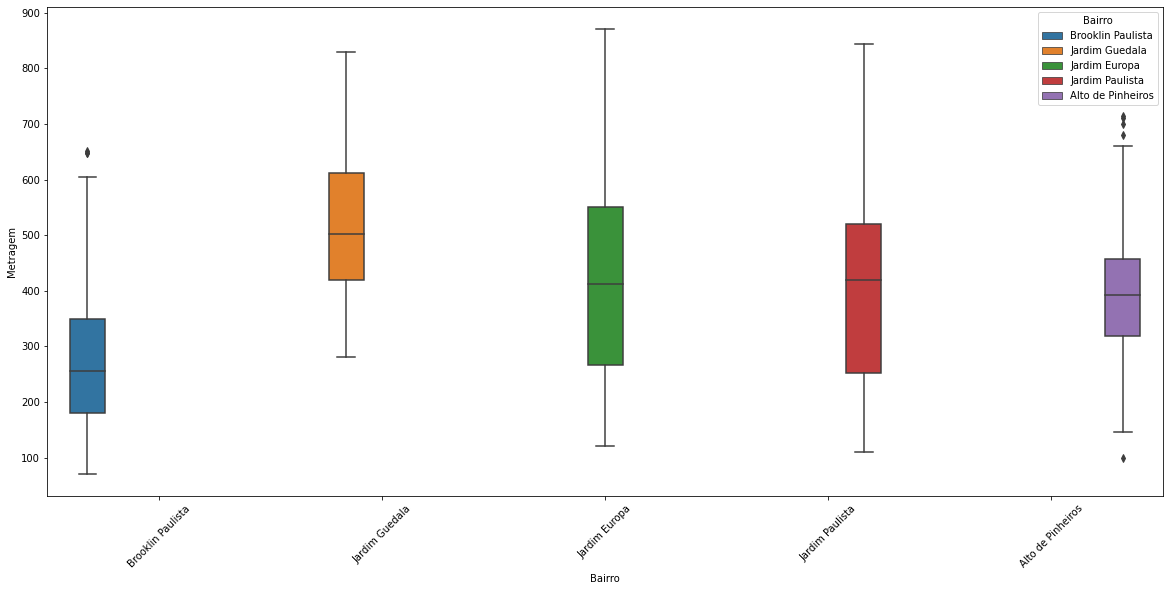

In [308]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="Bairro", y="Metragem", hue='Bairro', data=dados_vendas[f1 & f2 & f3 & f4].query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

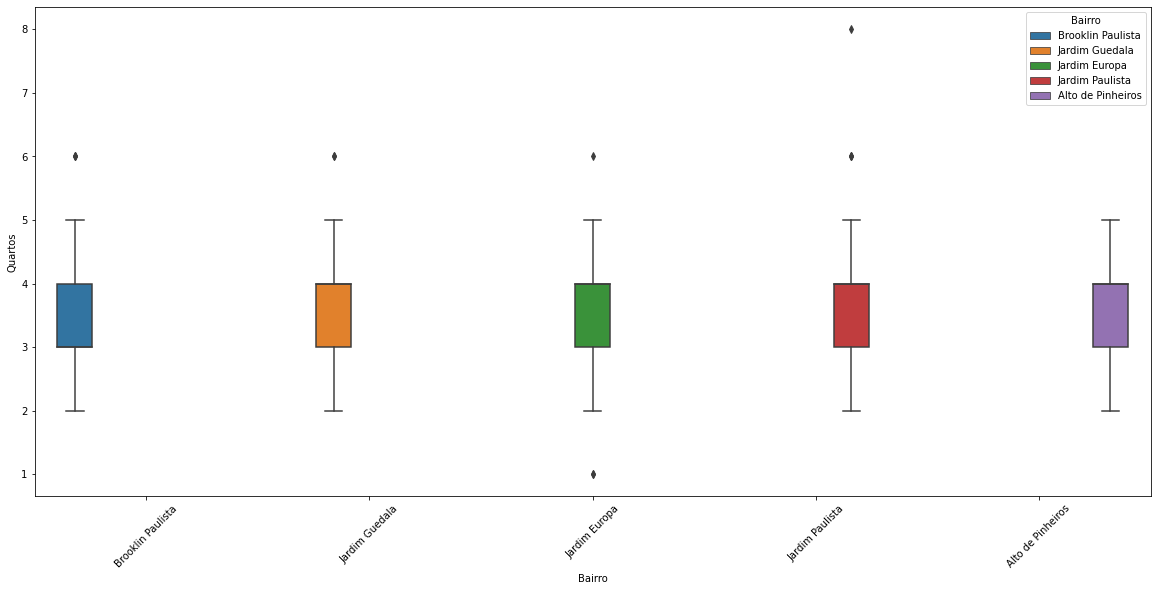

In [309]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="Bairro", y="Quartos", hue='Bairro', data=dados_vendas[f1 & f2 & f3 & f4].query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

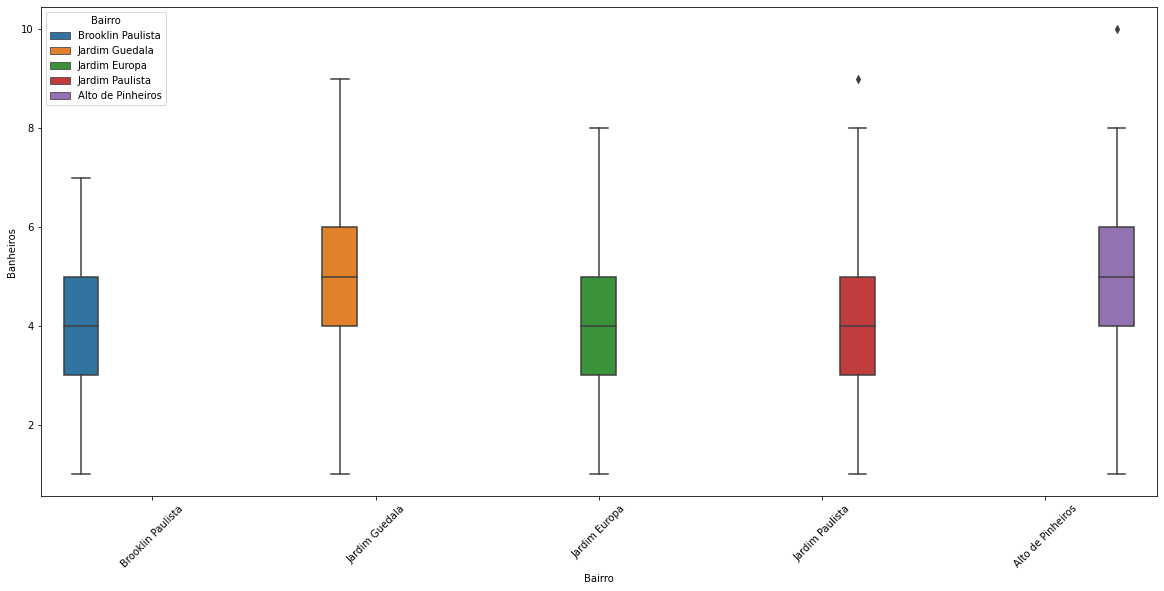

In [310]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="Bairro", y="Banheiros", hue='Bairro', data=dados_vendas[f1 & f2 & f3 & f4].query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

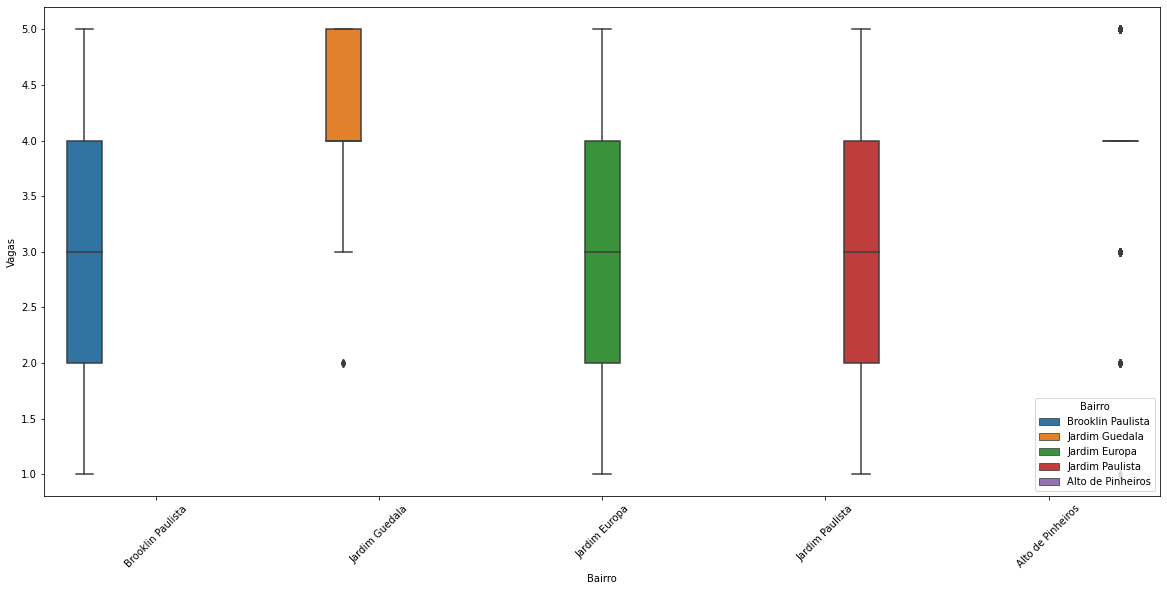

In [311]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="Bairro", y="Vagas", hue='Bairro', data=dados_vendas[f1 & f2 & f3 & f4].query("Bairro in @top15"))
ax.tick_params(axis='x', rotation = 45)
plt.show()

### 3 - Agrupar por mais categorias

In [324]:
vendas_pinheiros = dados_vendas[dados_vendas.Bairro == 'Alto de Pinheiros']
vendas_pinheiros

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Tipo_Aluguel,Valor_m2
83,"Rua Carlos Rath, 103",Alto de Pinheiros,São Paulo,400,5,4,4,2900000.000,None,7250.000
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,3500000.000,None,9776.536
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,5500000.000,None,12222.222
214,"Rua Açaré, 63",Alto de Pinheiros,São Paulo,252,3,5,4,2900000.000,None,11507.937
227,NaN,Alto de Pinheiros,São Paulo,360,3,5,4,4950000.000,None,13750.000
...,...,...,...,...,...,...,...,...,...,...
9691,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,2650000.000,None,5686.695
9696,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,2150000.000,None,14333.333
9727,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,2650000.000,None,5686.695
9732,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,2150000.000,None,14333.333


In [330]:
vendas_pinheiros.groupby(['Bairro', 'Quartos'])['Valor_m2'].describe()

count      mean      std       min       25%  \
Bairro            Quartos                                                  
Alto de Pinheiros 2         1.000 11166.667      NaN 11166.667 11166.667   
                  3        87.000 11462.710 3704.885  3495.441  9000.000   
                  4       224.000 11052.694 3634.344  4462.687  8587.258   
                  5        51.000 11946.380 4996.003  5535.714  7684.894   
                  6         3.000 16003.202 8410.124 11111.111 11147.661   
                  7         3.000  5707.255   35.610  5686.695  5686.695   

                                50%       75%       max  
Bairro            Quartos                                
Alto de Pinheiros 2       11166.667 11166.667 11166.667  
                  3       10819.672 13576.031 22985.782  
                  4       10694.028 12912.935 25172.886  
                  5       10536.398 13882.749 22727.273  
                  6       11184.211 18449.248 25714.286  
                  7        5686.695  5717.534  5748.373

### Imóveis com mais quartos no Alto de Pinheiros, provavelmente pela idade do imóvel e pela procura, possuem valores mais baixos de preço por m2

In [325]:
vendas_pinheiros.groupby(['Bairro', 'Quartos']).sum()

Metragem  Banheiros  Vagas  Valor_Anuncio  \
Bairro            Quartos                                              
Alto de Pinheiros 2             300          4      2    3350000.000   
                  3           30924        382    400  331409000.000   
                  4           99828       1090   1107 1085776915.000   
                  5           23946        273    279  301330000.000   
                  6            2225         15     18   35000000.000   
                  7            1393         18     21    7950000.000   

                             Valor_m2  
Bairro            Quartos              
Alto de Pinheiros 2         11166.667  
                  3        997255.773  
                  4       2475803.432  
                  5        609265.367  
                  6         48009.607  
                  7         17121.764

In [326]:
vendas_pinheiros.groupby(['Bairro', 'Quartos']).sum().describe()

,Metragem,Banheiros,Vagas,Valor_Anuncio,Valor_m2
count,6.000,6.000,6.000,6.000,6.000
mean,26436.000,297.000,304.500,294135985.833,693103.768
std,38233.867,419.491,426.084,415149794.497,960800.892
min,300.000,4.000,2.000,3350000.000,11166.667
25%,1601.000,15.750,18.750,14712500.000,24843.725
50%,13085.500,145.500,150.000,168165000.000,328637.487
75%,29179.500,354.750,369.750,323889250.000,900258.171
max,99828.000,1090.000,1107.000,1085776915.000,2475803.432


### Nem sempre muitos quartos são valorizados no Alto de Pinheiros

In [331]:
vendas_pinheiros.groupby(['Bairro', 'Banheiros']).sum()

Metragem  Quartos  Vagas  Valor_Anuncio  \
Bairro            Banheiros                                            
Alto de Pinheiros 1              3103       29     36   29240000.000   
                  2              5258       63     82   62230000.000   
                  3             17934      177    189  181281000.000   
                  4             28529      268    317  319420000.000   
                  5             45953      422    538  485438880.000   
                  6             34412      294    388  401865875.000   
                  7             17869      159    202  233051160.000   
                  8              4281       32     60   39889000.000   
                  10              555        5      5    6200000.000   
                  11              722        4     10    6200000.000   

                               Valor_m2  
Bairro            Banheiros              
Alto de Pinheiros 1           65406.921  
                  2          203380.301  
                  3          497804.491  
                  4          813849.667  
                  5         1146098.343  
                  6          837647.272  
                  7          498290.843  
                  8           76386.342  
                  10          11171.171  
                  11           8587.258

In [327]:
vendas_pinheiros.groupby(['Bairro', 'Banheiros']).sum().describe()

,Metragem,Quartos,Vagas,Valor_Anuncio,Valor_m2
count,10.000,10.000,10.000,10.000,10.000
mean,15861.600,145.300,182.700,176481591.500,415862.261
std,15955.581,144.418,181.032,176789237.254,407691.270
min,555.000,4.000,5.000,6200000.000,8587.258
25%,3397.500,29.750,42.000,31902250.000,68151.776
50%,11563.500,111.000,135.500,121755500.000,350592.396
75%,25880.250,245.250,288.250,297827790.000,734959.961
max,45953.000,422.000,538.000,485438880.000,1146098.343


In [332]:
vendas_pinheiros.groupby(['Bairro', 'Vagas']).sum()

Metragem  Quartos  Banheiros  Valor_Anuncio  \
Bairro            Vagas                                                
Alto de Pinheiros 1           100        3          2    1180000.000   
                  2          5905       60         73   57550000.000   
                  3         15927      151        177  178730000.000   
                  4         57492      555        663  653514915.000   
                  5         24355      231        293  275697000.000   
                  6         26040      221        264  269040000.000   
                  7         10181       97        110  144350000.000   
                  8          8771       61         84   88700000.000   
                  9           570        4          7    3290000.000   
                  10         5345       32         63   53369000.000   
                  12         2665       28         32   19395000.000   
                  14          660        4          2   13000000.000   
                  15          605        6         12    7000000.000   

                           Valor_m2  
Bairro            Vagas              
Alto de Pinheiros 1       11800.000  
                  2      188965.606  
                  3      493344.481  
                  4     1612044.737  
                  5      667254.232  
                  6      556597.149  
                  7      288300.613  
                  8      149919.855  
                  9        5771.930  
                  10      91485.033  
                  12      50299.928  
                  14      19696.970  
                  15      23142.077

In [328]:
vendas_pinheiros.groupby(['Bairro', 'Vagas']).sum().describe()

,Metragem,Quartos,Banheiros,Valor_Anuncio,Valor_m2
count,13.000,13.000,13.000,13.000,13.000
mean,12201.231,111.769,137.077,135755070.385,319894.047
std,16194.641,155.253,185.259,183327133.236,449080.901
min,100.000,3.000,2.000,1180000.000,5771.930
25%,660.000,6.000,12.000,13000000.000,23142.077
50%,5905.000,60.000,73.000,57550000.000,149919.855
75%,15927.000,151.000,177.000,178730000.000,493344.481
max,57492.000,555.000,663.000,653514915.000,1612044.737


# CONCLUSÃO
### O valor do m2 têm mais influência na media do número de quartos do que do número de banheiros na base analisada para o bairro de Alto de Pinheiros	

### O número de vagas influencia menos ainda na media do m2